# Gradient Ascentfor Bring Home Water
This small notebook shows how to run the basic gradient ascent stochastic ascent on the Bring Home Water problem.


In [1]:
%matplotlib inline
import gd
import matplotlib.pyplot as plt

## Parameters to play with
Below i have listed the parameters to play with
- T is duration to consider
- N is number of steps to do
- hamiltonian_grid_size: the size of the grid used to discretize the hamiltonian operator - large means more accurate but slower algorithm - but we set it small here because the algorithm becomes very slow
- A amplitude of controllable tweezer
- B amplitude of fixed tweezer
- superposition - try to move atom to superposition

We have fixed some standard value below and run the stochastic ascent algorithm that prints out what it is doing.
We have on purpose used smaller hamiltonian_grid_size compared to the experiments in the note because it speeds everything up and works well enough.
In the following cell we run the stochastic ascent algorithm with these parameters. 

In [2]:
T = 0.2
N = 80
hamiltonian_grid_size = 32
A = 160
B = 130
fix_start = True
superposition = None
params = {'T': T, 'N': N, 'hamiltonian_grid_size': hamiltonian_grid_size, 
          'Alpha': A, 'Beta': B,  'superposition': superposition}
rounds = 100
lr = 0.05

## Uniform initalization 
We run only 100 steps of gradient ascent with a poor value chosen for discretation of the hamiltonian. Otherwise our patience runs thin in a simple proof of concept.
Every run may give very different results and do not expect to much from this small run.

In [3]:
start_protocol = gd.uniform_init(N, -1, 1)
fid_uni, prot_uni, hist_uni = gd.run(params, lr=lr, rounds=rounds, start_protocol=start_protocol)

random init
Time Per Step is: 0.0025
starting loss 0.9965151439474856 fid 0.0034848560525143624
round 0: fidel 0.0034848560525143624, grad_norm 0.05775004333652216
round 1: fidel 0.016309975702661905, grad_norm 0.13061720797933365, New Best
round 2: fidel 0.037534107695539, grad_norm 0.19463817947851111, New Best
round 3: fidel 0.061632170965614574, grad_norm 0.24651724557406657, New Best
round 4: fidel 0.08211765927841264, grad_norm 0.2609784158722771, New Best
round 5: fidel 0.10080562603612409, grad_norm 0.2201222121738036, New Best
round 6: fidel 0.1135077588444815, grad_norm 0.1770602172383308, New Best
round 7: fidel 0.12023720706182095, grad_norm 0.15600423737280092, New Best
round 8: fidel 0.11964615264384415, grad_norm 0.23930285368893447
round 9: fidel 0.1255853806001389, grad_norm 0.14878222396937235, New Best
round 10: fidel 0.12792122107277648, grad_norm 0.16227337088438304, New Best
round 11: fidel 0.12692658537883061, grad_norm 0.20574539792727126
round 12: fidel 0.12874

## Lets plot the protocol and see what it looks like
It is usually not pretty.

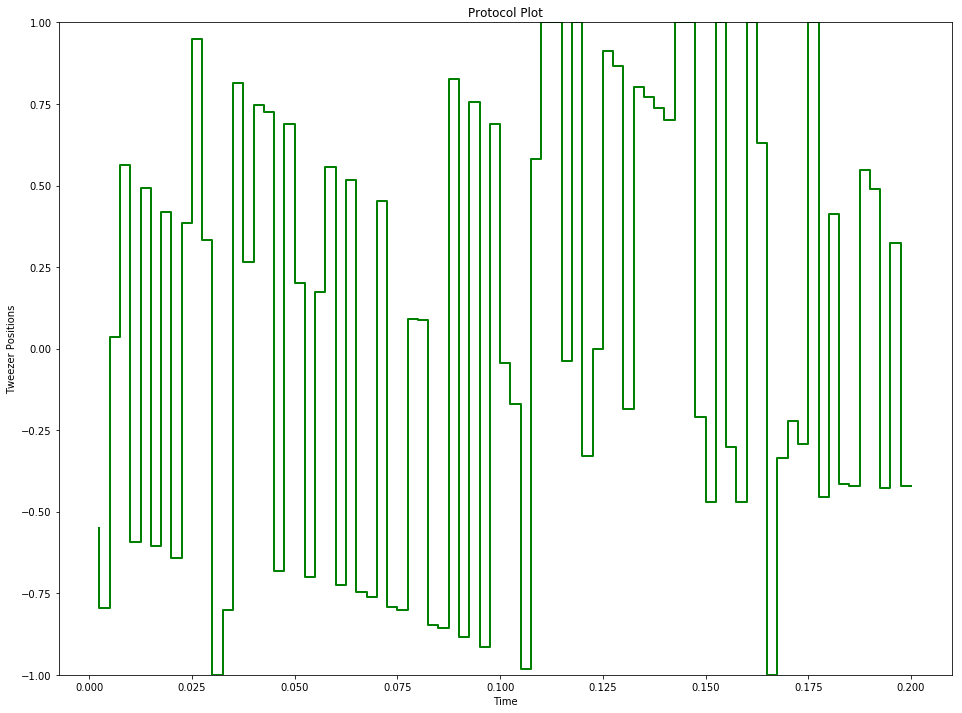

In [4]:
gd.plot_protocol(prot_uni, t=params['T'])
plt.show()

## Better Initialization
Starting from the zero vector or simple linear motion instead


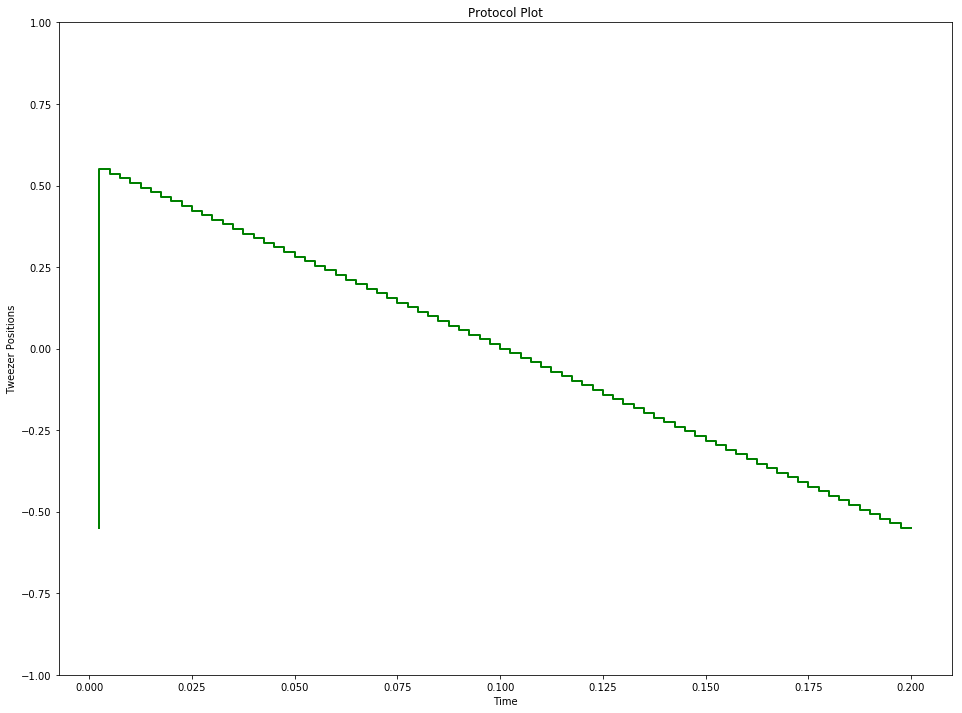

In [5]:
import numpy as np
# protocol is x_n,...,x_1 i.e. last value is first step and first value is last step
line_protocol = np.array(list(np.linspace(-0.55, 0.55, N-1)) + [-0.55]).reshape(-1, 1)
gd.plot_protocol(line_protocol, T)
plt.show()

Time Per Step is: 0.0025
starting loss 0.45529425338518315 fid 0.5447057466148169
round 0: fidel 0.5447057466148169, grad_norm 5.397087056736725
round 1: fidel 0.0935262671139766, grad_norm 1.33345926388992
round 2: fidel 0.5204897446176985, grad_norm 1.894483713409568
round 3: fidel 0.7061555769569596, grad_norm 2.586106566477259, New Best
round 4: fidel 0.47965686923865447, grad_norm 4.464618865420513
round 5: fidel 0.6767328257536159, grad_norm 3.430065315335292
round 6: fidel 0.5491646638805564, grad_norm 4.303517319513662
round 7: fidel 0.683157577302997, grad_norm 3.347051122385174
round 8: fidel 0.5665090967755674, grad_norm 4.262380223513345
round 9: fidel 0.6922624552663982, grad_norm 3.2813109721953486
round 10: fidel 0.5735164910865221, grad_norm 4.242951536998746
round 11: fidel 0.6952050848955524, grad_norm 3.259026101161155
round 12: fidel 0.5746541415045296, grad_norm 4.239641700082997
round 13: fidel 0.6944851211392515, grad_norm 3.2645284286217717
round 14: fidel 0.572

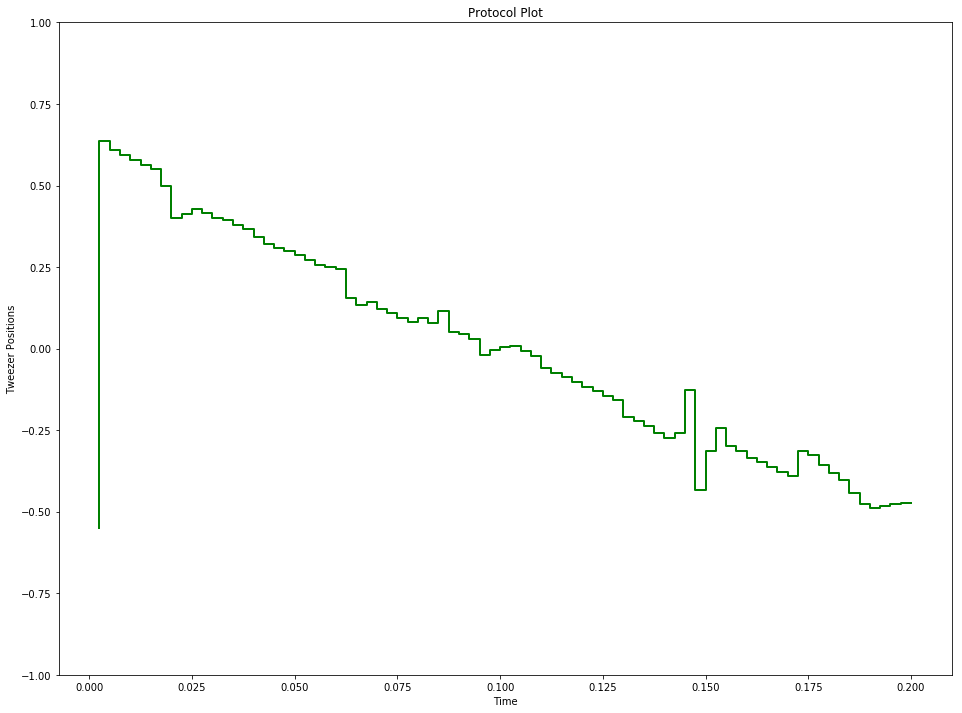

In [6]:
fid_lin, prot_lin, hist_lin = gd.run(params, lr=lr, rounds=100, start_protocol=line_protocol)
gd.plot_protocol(prot_lin, T)
plt.show()

# Another Initiliaztion - Tweezer in the middle/The zero vector

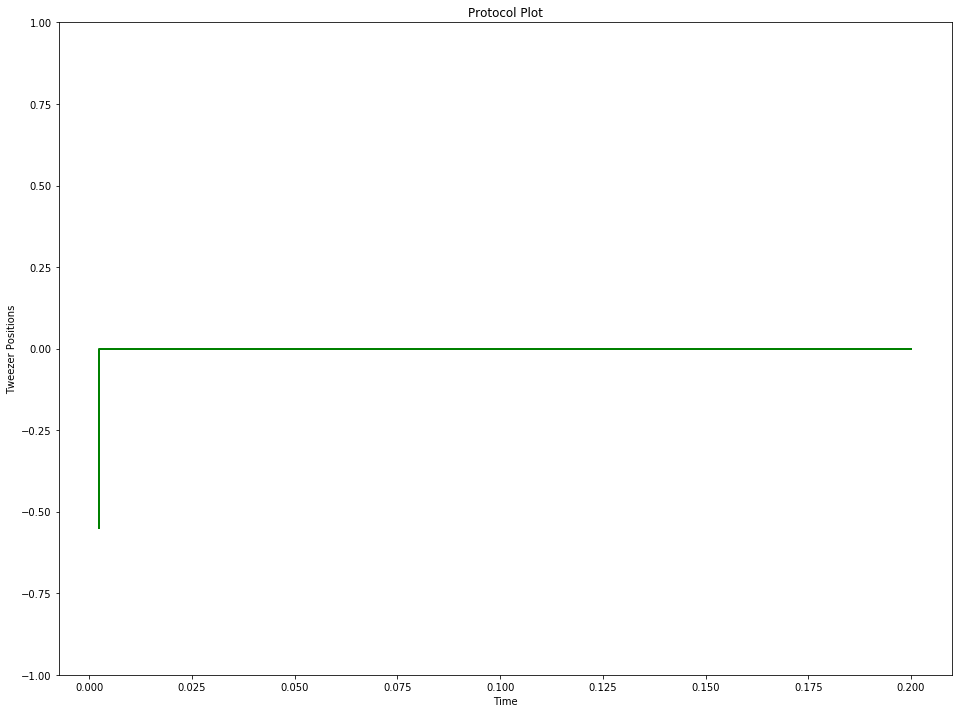

In [7]:
# protocol is x_n,...,x_1 i.e. last value is first step and first value is last step
zero_protocol = np.zeros((N, 1))
zero_protocol[-1] = -0.55
gd.plot_protocol(zero_protocol, T)
plt.show()

Time Per Step is: 0.0025
starting loss 0.9999777086701509 fid 2.2291329849100094e-05
round 0: fidel 2.2291329849100094e-05, grad_norm 0.0012593792797839821
round 1: fidel 0.0018916097537314824, grad_norm 0.01026442543905293, New Best
round 2: fidel 0.0054318918489182355, grad_norm 0.022385216097806433, New Best
round 3: fidel 0.011663298027594471, grad_norm 0.0526118717718931, New Best
round 4: fidel 0.02292922780286144, grad_norm 0.09024400793781207, New Best
round 5: fidel 0.03938509781093613, grad_norm 0.17044780661946665, New Best
round 6: fidel 0.06546013025019137, grad_norm 0.248733796130435, New Best
round 7: fidel 0.0947388472219971, grad_norm 0.4077000777376146, New Best
round 8: fidel 0.1432390994333822, grad_norm 0.4502028059129222, New Best
round 9: fidel 0.17928840362783205, grad_norm 0.6191766252100164, New Best
round 10: fidel 0.21195700675320783, grad_norm 0.6753760817580693, New Best
round 11: fidel 0.2256652804935788, grad_norm 0.8555604942509811, New Best
round 12: f

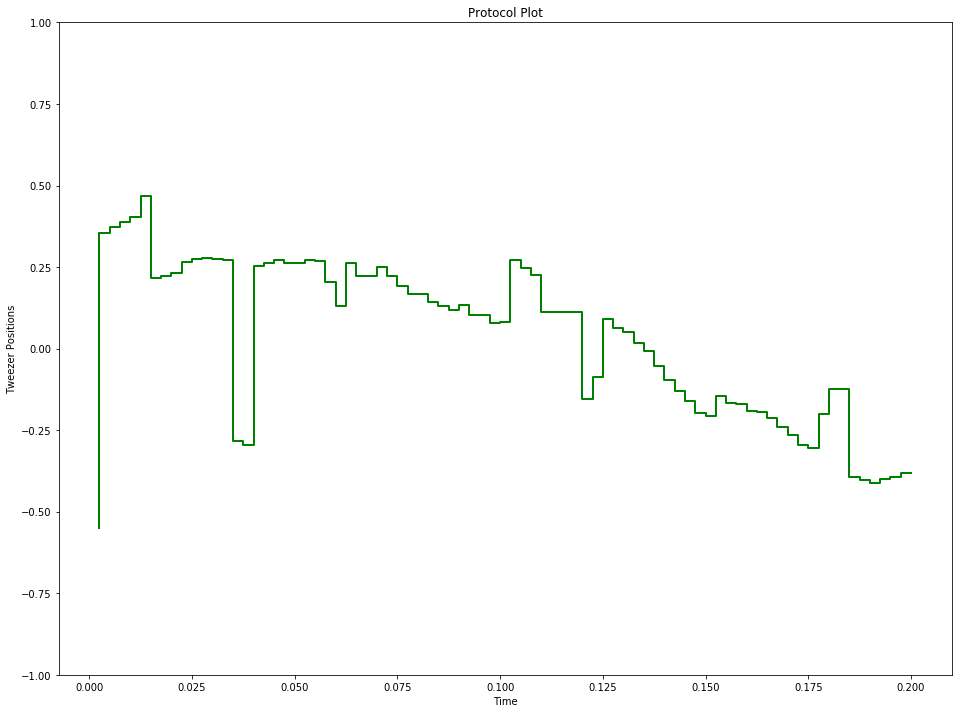

In [8]:
fid_zero, prot_zero, hist_zero = gd.run(params, lr=lr, rounds=100, start_protocol=zero_protocol)
gd.plot_protocol(prot_zero, T)
plt.show()